In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os

# path to your project folder in Drive
project_path = '/content/drive/MyDrive/ds_BhumikaTusamad/csv_files'

# list files in the folder
files = os.listdir(project_path)
print("Files in csv_files folder:", files)


Files in csv_files folder: ['trader_data.csv', 'bitcoin_sentiment.csv']


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Path to your CSV files
csv_path = '/content/drive/MyDrive/ds_BhumikaTusamad/csv_files'

trader_file = f'{csv_path}/trader_data.csv'
sentiment_file = f'{csv_path}/bitcoin_sentiment.csv'

In [9]:
# Load trader data
trader = pd.read_csv(trader_file, low_memory=False)

# Load sentiment data
sentiment = pd.read_csv(sentiment_file, low_memory=False)

In [10]:
# Preview trader data
print("Trader Data Preview:")
display(trader.head())
print("Trader Data Info:")
display(trader.info())

# Preview sentiment data
print("Sentiment Data Preview:")
display(sentiment.head())
print("Sentiment Data Info:")
display(sentiment.info())


Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

None

Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

In [12]:
# Check column names in trader dataset
print(trader.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [14]:
# Check column names in sentiment dataset
print(sentiment.columns.tolist())


['timestamp', 'value', 'classification', 'date']


In [15]:
# Convert trader 'Timestamp IST' column to datetime
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], errors='coerce')

# Convert sentiment 'date' column to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# Quick check
print("Trader timestamps:")
print(trader[['Timestamp IST']].head())

print("\nSentiment dates:")
print(sentiment[['date', 'classification']].head())


Trader timestamps:
        Timestamp IST
0 2024-02-12 22:50:00
1 2024-02-12 22:50:00
2 2024-02-12 22:50:00
3 2024-02-12 22:50:00
4 2024-02-12 22:50:00

Sentiment dates:
        date classification
0 2018-02-01           Fear
1 2018-02-02   Extreme Fear
2 2018-02-03           Fear
3 2018-02-04   Extreme Fear
4 2018-02-05   Extreme Fear


In [16]:
# Remove spaces and make lowercase for trader columns
trader.columns = [col.strip().replace(' ', '_').lower() for col in trader.columns]
print(trader.columns)


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')


In [17]:
# Remove spaces and make lowercase for sentiment columns
sentiment.columns = [col.strip().replace(' ', '_').lower() for col in sentiment.columns]
print(sentiment.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [18]:
# Trader missing values
print("Missing values in trader data:")
print(trader.isnull().sum())

# Sentiment missing values
print("\nMissing values in sentiment data:")
print(sentiment.isnull().sum())


Missing values in trader data:
account                  0
coin                     0
execution_price          0
size_tokens              0
size_usd                 0
side                     0
timestamp_ist       131999
start_position           0
direction                0
closed_pnl               0
transaction_hash         0
order_id                 0
crossed                  0
fee                      0
trade_id                 0
timestamp                0
dtype: int64

Missing values in sentiment data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [19]:
# Trader duplicates
print("Duplicate rows in trader data:", trader.duplicated().sum())

# Sentiment duplicates
print("Duplicate rows in sentiment data:", sentiment.duplicated().sum())


Duplicate rows in trader data: 0
Duplicate rows in sentiment data: 0


Trades by side:
side
SELL    108528
BUY     102696
Name: count, dtype: int64


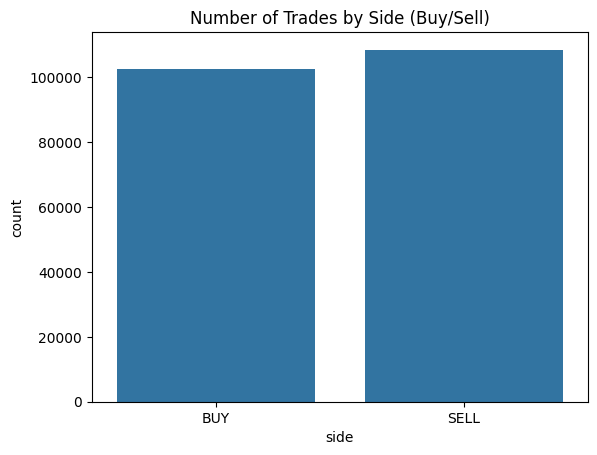

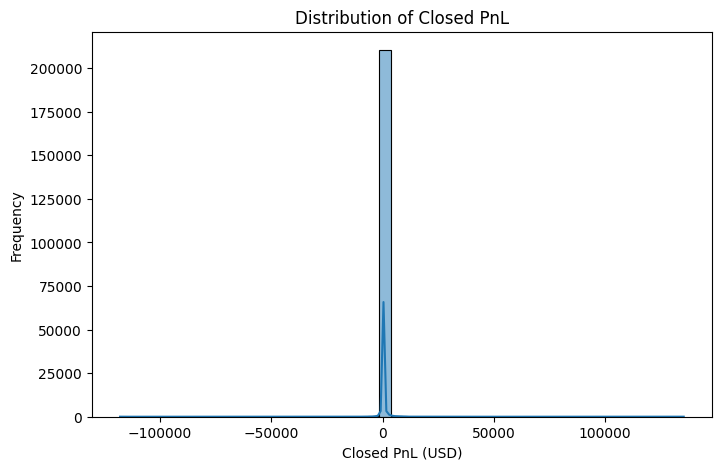


Market sentiment counts:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Summary statistics
trader[['closed_pnl', 'size_usd']].describe()

# 2️⃣ Count of trades by side
side_counts = trader['side'].value_counts()
print("Trades by side:")
print(side_counts)

sns.countplot(x='side', data=trader)
plt.title("Number of Trades by Side (Buy/Sell)")
plt.show()

# 3️⃣ Distribution of Closed PnL
plt.figure(figsize=(8,5))
sns.histplot(trader['closed_pnl'], bins=50, kde=True)
plt.title("Distribution of Closed PnL")
plt.xlabel("Closed PnL (USD)")
plt.ylabel("Frequency")
plt.show()

# 4️⃣ Market sentiment counts
sentiment_counts = sentiment['classification'].value_counts()
print("\nMarket sentiment counts:")
print(sentiment_counts)


In [23]:
# Create a new column with only the date part
trader['trade_date'] = trader['timestamp_ist'].dt.date


In [24]:
# Merge trader data with sentiment data
# First, make sure sentiment 'date' column is of type date (not datetime)
sentiment['date'] = sentiment['date'].dt.date

# Merge on date
merged_data = pd.merge(trader, sentiment, left_on='trade_date', right_on='date', how='left')

# Check first few rows
merged_data[['trade_date', 'closed_pnl', 'size_usd', 'side', 'classification']].head()


,trade_date,closed_pnl,size_usd,side,classification
0,2024-02-12,0.0,7872.16,BUY,Greed
1,2024-02-12,0.0,127.68,BUY,Greed
2,2024-02-12,0.0,1150.63,BUY,Greed
3,2024-02-12,0.0,1142.04,BUY,Greed
4,2024-02-12,0.0,69.75,BUY,Greed


In [25]:
print("Number of trades per sentiment:")
print(merged_data['classification'].value_counts())


Number of trades per sentiment:
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


In [26]:
# Group by sentiment and calculate average profit/loss
pnl_by_sentiment = merged_data.groupby('classification')['closed_pnl'].mean().sort_values(ascending=False)
print("Average Closed PnL by Sentiment:")
print(pnl_by_sentiment)


Average Closed PnL by Sentiment:
classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Extreme Fear       1.891632
Name: closed_pnl, dtype: float64


In [27]:
# Group by sentiment and calculate average trade size
size_by_sentiment = merged_data.groupby('classification')['size_usd'].mean().sort_values(ascending=False)
print("\nAverage Trade Size by Sentiment:")
print(size_by_sentiment)



Average Trade Size by Sentiment:
classification
Fear             5744.782685
Greed            5051.878829
Neutral          4332.202906
Extreme Fear     4118.761840
Extreme Greed    3242.085086
Name: size_usd, dtype: float64


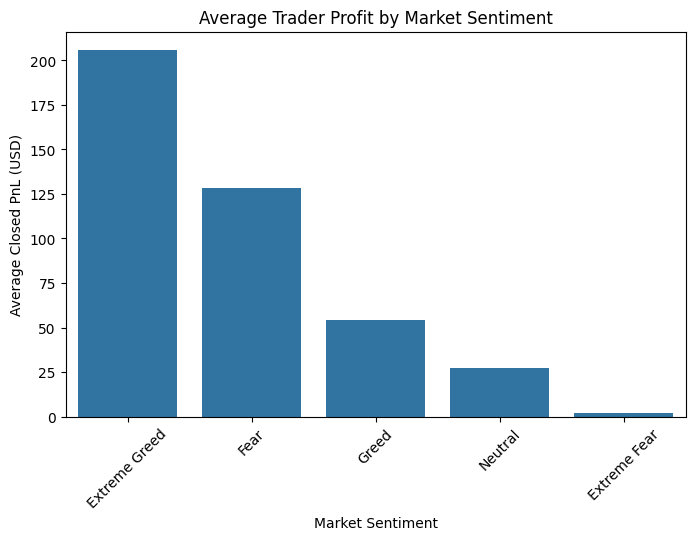

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values)
plt.title("Average Trader Profit by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL (USD)")
plt.xticks(rotation=45)
plt.show()


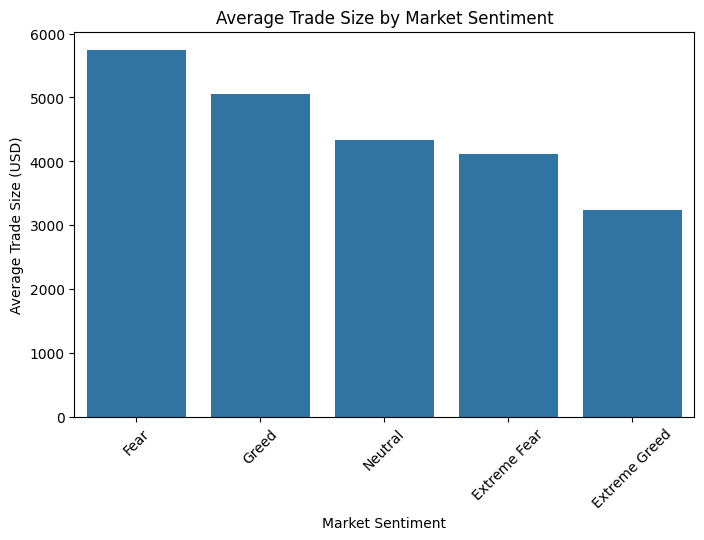

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x=size_by_sentiment.index, y=size_by_sentiment.values)
plt.title("Average Trade Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Count of Buy/Sell trades per sentiment
side_sentiment_counts = merged_data.groupby(['classification', 'side']).size().unstack(fill_value=0)
print(side_sentiment_counts)


side             BUY  SELL
classification            
Extreme Fear    1168  1158
Extreme Greed   1661  3960
Fear            7307  6562
Greed           5407  5885
Neutral         1020  1736


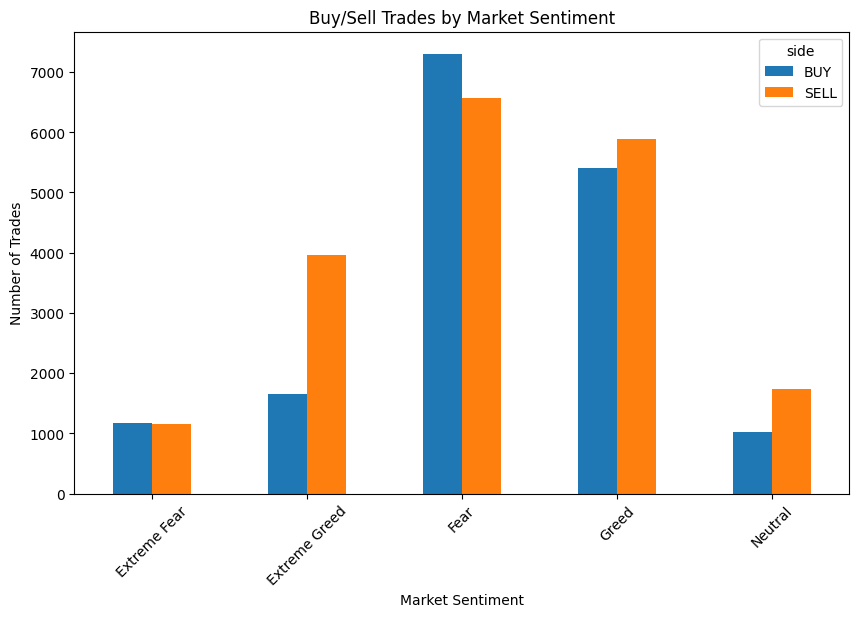

In [31]:
side_sentiment_counts.plot(kind='bar', figsize=(10,6))
plt.title("Buy/Sell Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.show()


In [32]:
import os

# Create outputs folder if it doesn't exist
output_folder = '/content/drive/MyDrive/ds_BhumikaTusamad/outputs'
os.makedirs(output_folder, exist_ok=True)

# Save your plots
plt.figure(figsize=(8,5))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values)
plt.title("Average Trader Profit by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL (USD)")
plt.xticks(rotation=45)
plt.savefig(f"{output_folder}/avg_profit_by_sentiment.png")
plt.close()

plt.figure(figsize=(8,5))
sns.barplot(x=size_by_sentiment.index, y=size_by_sentiment.values)
plt.title("Average Trade Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.savefig(f"{output_folder}/avg_size_by_sentiment.png")
plt.close()

side_sentiment_counts.plot(kind='bar', figsize=(10,6))
plt.title("Buy/Sell Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.savefig(f"{output_folder}/buy_sell_by_sentiment.png")
plt.close()
